In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('./drive/MyDrive/Datasets/products.csv')

In [ ]:
df.head()

,ProductCategory,Price,Quantity,PurchaseDate,Discount
0,Books,25.24441,6.0,23-06-2022,False
1,Electronics,109.65720,3.0,30-10-2021,False
2,Books,87.97540,7.0,09-07-2020,False
3,Books,196.65190,NaN,08-12-2021,False
4,Electronics,31.28739,9.0,24-11-2022,False


<pre>
First Quartile and Third Quartile
First Quartile: Median of Lower half of DATASET
Third Quartile: Median of Upper half of DATASET

Use Box plot to find Outliers

inter quartile range
: Difference between 3rd and 1st quartile
          q3 - q1

Example:
  __________ __ ___________
  9, 10, 11, 14, 15, 23, 42
      |       |       |
      |     median    |
      Q1      QR      Q3
Outliers:
  Any data point less than        <code>Q1 - (1.5*QR)</code>
  Any data point greater than     <code>Q3 + (1.5*QR)</code>
Remove it
</pre>

In [ ]:
df['Quantity'] = df['Quantity'].fillna(0)

df['Price'] = df['Price'].fillna(0)

In [ ]:
df['Quantity'].isnull().sum()

0

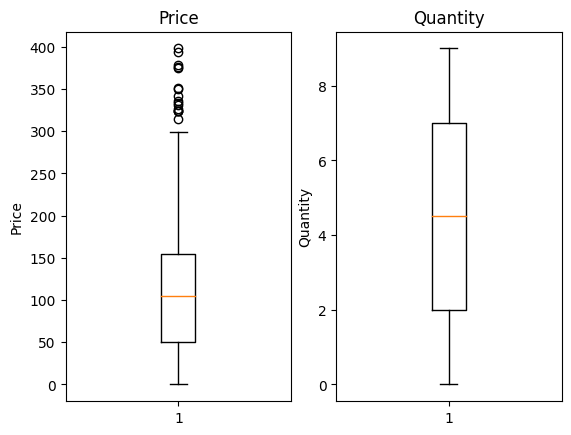

In [ ]:
fig,(g1,g2) = plt.subplots(1,2,dpi = 100)
g1.boxplot(df['Price'])
g1.set_title('Price')
g1.set_ylabel('Price')
g2.set_title('Quantity')
g2.set_ylabel('Quantity')
g2.boxplot(df['Quantity'])
plt.show()

In [ ]:
#remove outliers

q1,q3 = np.percentile(df['Price'],[25,75])
iqr = q3-q1
lb = q1 - (1.5*iqr)
ub = q3 + (1.5*iqr)

In [ ]:
u_array = np.where(df['Price']>ub)[0]
l_array = np.where(df['Price']<lb)[0]

In [ ]:
u_array

array([ 48,  99, 138, 142, 251, 271, 317, 318, 381, 432, 468, 551, 569,
       650, 735, 747])

In [ ]:
df.drop(index = u_array, inplace = True)

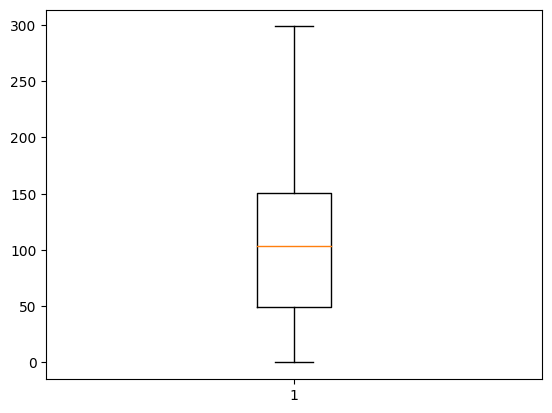

In [ ]:
fig = plt.figure()
plt.boxplot(df['Price'])
plt.show()

Label Encoder: Return Labels Encoded to Numbers

In [ ]:

'''
le = LabelEncoder()
le.fit(df['ProductCategory'])
df.ProductCategory= le.transform(df.ProductCategory)
df.head()

le.fit(df['Discount'])

df.Discount= le.transform(df.Discount)

df.head()
'''

"\nle = LabelEncoder()\nle.fit(df['ProductCategory'])\ndf.ProductCategory= le.transform(df.ProductCategory)\ndf.head()\n\nle.fit(df['Discount'])\n\ndf.Discount= le.transform(df.Discount)\n\ndf.head()\n"

<b>OneHotEncoder</b><br>Creates a Vector[n] for n values

In [ ]:
ohe = OneHotEncoder()

In [ ]:
df['ProductCategory'] = df['ProductCategory'].astype('category')

In [ ]:
df['PCnew'] = df['ProductCategory'].cat.codes

In [ ]:
df['PCnew']

0      0
1      2
2      0
3      0
4      2
      ..
995    1
996    1
997    0
998    0
999    2
Name: PCnew, Length: 984, dtype: int8

In [ ]:
enc_PC = ohe.fit_transform(df[['PCnew']]).toarray()

In [ ]:
enc_PC

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
newDF = df.join(pd.DataFrame(enc_PC))

In [ ]:
newDF.drop('ProductCategory', axis = 1, inplace = True)

In [ ]:
newDF.head()


,Price,Quantity,PurchaseDate,Discount,PCnew,0,1,2
0,25.24441,6.0,23-06-2022,False,0,1.0,0.0,0.0
1,109.65720,3.0,30-10-2021,False,2,0.0,0.0,1.0
2,87.97540,7.0,09-07-2020,False,0,1.0,0.0,0.0
3,196.65190,0.0,08-12-2021,False,0,1.0,0.0,0.0
4,31.28739,9.0,24-11-2022,False,2,0.0,0.0,1.0


<pre>
**Naive Bayes**

Assumes that all features are independent




P(A|B)
it is a probability that one event A will happen given that another event B happens
</pre>